### 190648C
### VIKASITHA K.S.S.
#### ASSIGNMENT 01
https://github.com/SasininduSV/EN2550-Assignment-01.git

$Q 1$

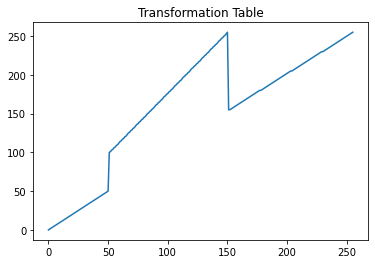

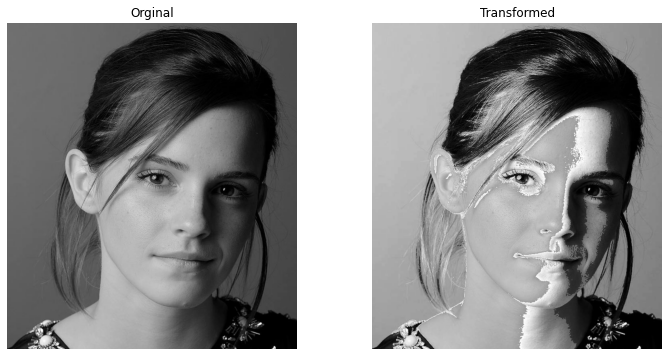

In [79]:
# Q1

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\emma_gray.jpg')
assert im is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(155,255,105)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
g = cv.LUT(im,t)

fig , ax = plt.subplots()
ax.plot(t)
ax.set_title("Transformation Table")

fig , ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(im,cmap='gray', vmin=0,vmax=255)
ax[0].set_title("Orginal")
ax[0].axis('off')
ax[1].imshow(g,cmap='gray', vmin=0,vmax=255)
ax[1].set_title("Transformed")
ax[1].axis('off')
plt.show()



The transformation has linearly scaled up the intensity values between 50-150 upto 100-255.
As an instance it transforms $150 \to 255$ but $151 \to 151$. That has caused for the distortion of the $transformed$ $image$.

$Q 2$

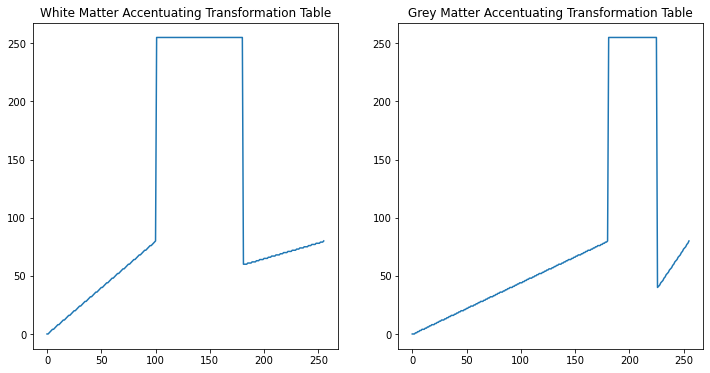

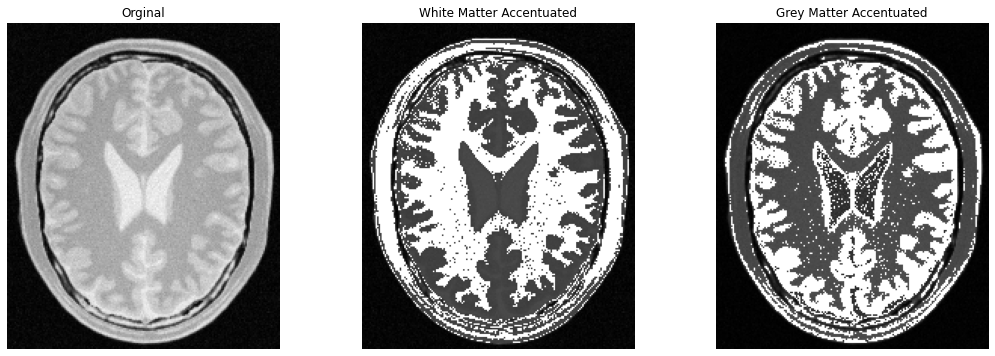

In [80]:
# Q2

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\brain_proton_density_slice.png')
assert im is not None

# White Matter Accentuating Transformation Table
t1 = np.linspace(0,80,101)
t2 = np.linspace(255,255,80)
t3 = np.linspace(60,80,75)

# Grey Matter Accentuating Transformation Table
t1_ = np.linspace(0,80,181)
t2_ = np.linspace(255,255,45)
t3_ = np.linspace(40,80,30)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
g = cv.LUT(im,t)

t_ = np.concatenate((t1_,t2_,t3_),axis=0).astype(np.uint8)
g_ = cv.LUT(im,t_)

fig , ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(t)
ax[0].set_title("White Matter Accentuating Transformation Table")
ax[1].plot(t_)
ax[1].set_title("Grey Matter Accentuating Transformation Table")

fig , ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(im,cmap='gray', vmin=0,vmax=255)
ax[0].set_title("Orginal")
ax[0].axis('off')
ax[1].imshow(g,cmap='gray', vmin=0,vmax=255)
ax[1].set_title("White Matter Accentuated")
ax[1].axis('off')
ax[2].imshow(g_,cmap='gray', vmin=0,vmax=255)
ax[2].set_title("Grey Matter Accentuated")
ax[2].axis('off')
plt.show()


It can be seen that the colors of $white$ $matter$ & $gray$ $matter$ are considerabally different. I implemented two differnet intesity transformations to accentuate $white$ $matter$ & $gray$ $matter$. To accentuate $white$ $matter$ I have transformed the intensity values respective to that $matter$ upto 255. The same procedure has been applied to accentuate $gray$ $matter$.

$Q 3$

Gamma = 0.5


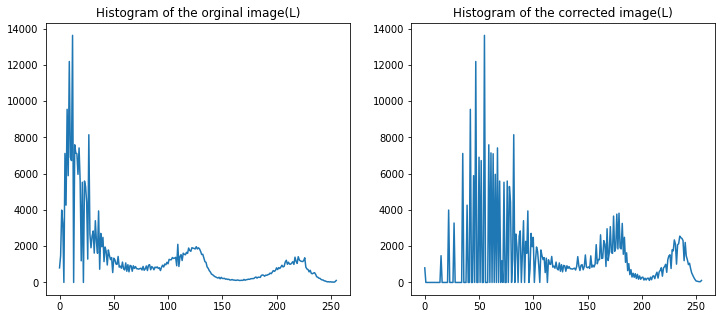

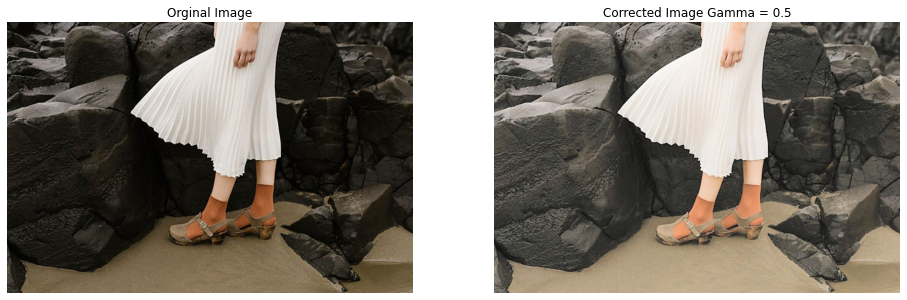

In [81]:
# Q3

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\highlights_and_shadows.jpg')
assert im is not None

g = cv.cvtColor(im, cv.COLOR_BGR2LAB)

hist_o = cv.calcHist([g],[0],None,[256],[0,256])

gamma = 0.5

for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        g[i,j,0]=(g[i,j,0]/255)**gamma*255

hist_c = cv.calcHist([g],[0],None,[256],[0,256])

im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_LAB2RGB)

fig , ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(hist_o)
ax[0].set_title("Histogram of the orginal image(L)")
ax[1].plot(hist_c)
ax[1].set_title("Histogram of the corrected image(L)")

print("Gamma =",gamma)

fig , ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(im)
ax[0].set_title("Orginal Image")
ax[0].axis('off')
ax[1].imshow(g)
ax[1].set_title("Corrected Image Gamma = "+str(gamma))
ax[1].axis('off')
plt.show()


$L$ stands for Luminance dimension. Even though the range of $L$ is $0<L<100$, $opencv$ maps its range to $0<L<255$. Higher the $L$, lighter the image.

$Q 4$

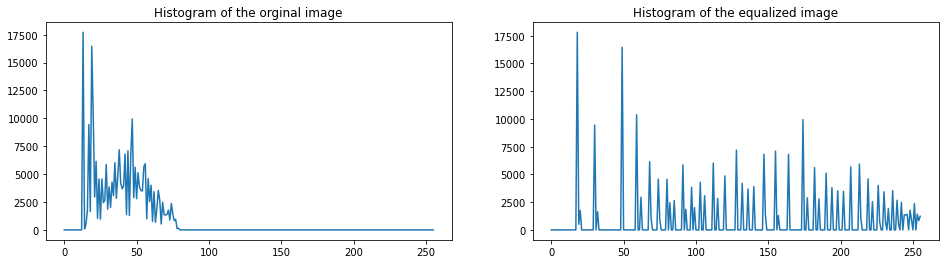

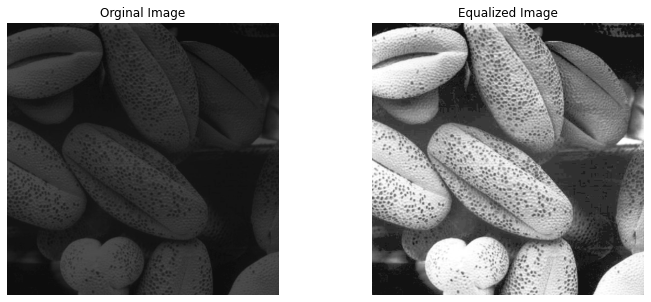

In [82]:
# Q4

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\shells.png',cv.IMREAD_GRAYSCALE)
assert im is not None

# Histogram Equalization function
def histEqualization(img):
    his = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            his[img[i,j]] += 1
    cum_sum = np.concatenate((np.array([his[0]]),np.zeros(255)))
    for i in range(1,256):
        cum_sum[i]=his[i]+cum_sum[i-1]
    a = (255/cum_sum[-1])
    b = a*cum_sum
    b = np.array([round(i) for i in b])
    g = cv.LUT(img,b)
    return g

hist_o = cv.calcHist([im],[0],None,[256],[0,256])
im_ = (histEqualization(im)).astype(np.uint8)
hist_e = cv.calcHist([im_],[0],None,[256],[0,256])

fig , ax = plt.subplots(1,2, figsize=(16,4))
ax[0].plot(hist_o)
ax[0].set_title("Histogram of the orginal image")
ax[1].plot(hist_e)
ax[1].set_title("Histogram of the equalized image")
plt.show()

fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(im, cmap='gray', vmin=0,vmax=255)
ax[0].set_title("Orginal Image")
ax[0].axis('off')
ax[1].imshow(im_, cmap='gray', vmin=0,vmax=255)
ax[1].set_title("Equalized Image")
ax[1].axis('off')
plt.show()

$Q 5$ $(a)$

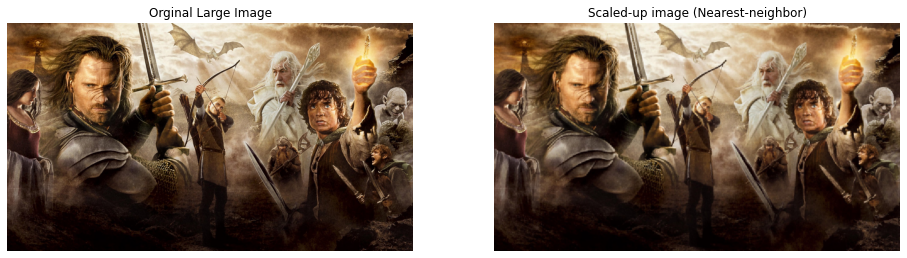

Noramalized sum of squared difference = 0.022723643


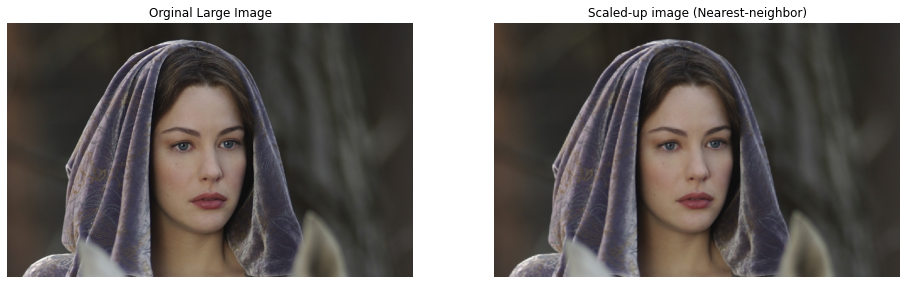

Noramalized sum of squared difference = 0.010222389


In [83]:
# Q5 (a)

def nearestNeiZooming(img , scale):
    import numpy as np
    newIMG = np.zeros((scale*img.shape[0],scale*img.shape[1],3),dtype=np.uint8)
    for i in range(0,newIMG.shape[0]):
        for j in range(0,newIMG.shape[1]):
            r , c = round(i/scale) , round(j/scale)
            if r == img.shape[0]:
                r = img.shape[0]-1
            if c == img.shape[1]:
                c = img.shape[1]-1
            newIMG[i,j] = img[r,c]
    return (newIMG.astype(np.uint8))

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im1 = cv.imread(r'Assignment-01 Materials\a1q5images\im01small.png')
assert im1 is not None
im1_large_org = cv.imread(r'Assignment-01 Materials\a1q5images\im01.png')
assert im1_large_org is not None
im2 = cv.imread(r'Assignment-01 Materials\a1q5images\im02small.png')
assert im1 is not None
im2_large_org = cv.imread(r'Assignment-01 Materials\a1q5images\im02.png')
assert im1_large_org is not None

im1_zoomed = nearestNeiZooming(im1,4)
im2_zoomed = nearestNeiZooming(im2,4)

fig , ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(cv.cvtColor(im1_large_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Orginal Large Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(im1_zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title("Scaled-up image (Nearest-neighbor)")
ax[1].axis('off')
plt.show()

NSSD1 = cv.matchTemplate(im1_large_org,im1_zoomed,cv.TM_SQDIFF_NORMED)
print("Noramalized sum of squared difference =",NSSD1[0,0])

fig , ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(cv.cvtColor(im2_large_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Orginal Large Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(im2_zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title("Scaled-up image (Nearest-neighbor)")
ax[1].axis('off')
plt.show()

NSSD2 = cv.matchTemplate(im2_large_org,im2_zoomed,cv.TM_SQDIFF_NORMED)
print("Noramalized sum of squared difference =",NSSD2[0,0])

$Q 5$ $(b)$

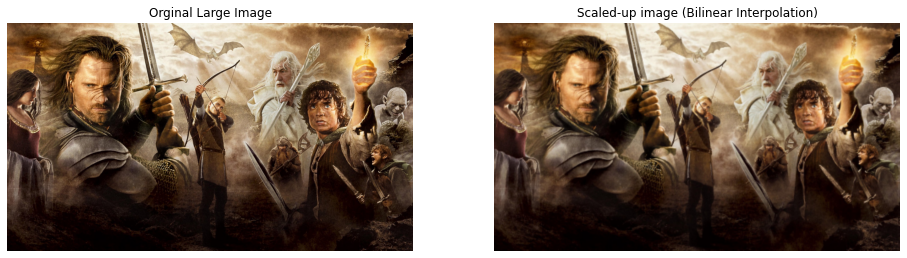

Noramalized sum of squared difference = 0.017942213


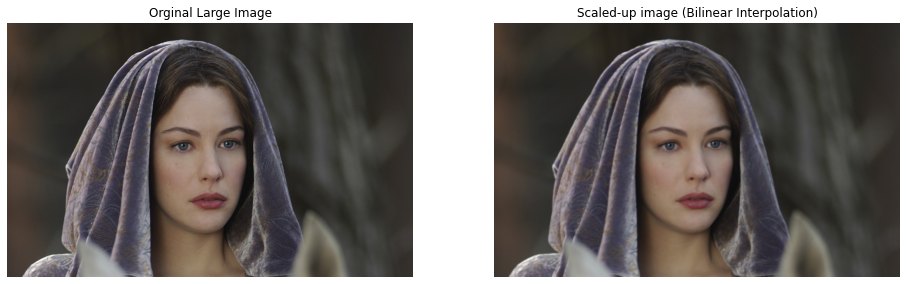

Noramalized sum of squared difference = 0.0077916514


In [84]:
# Q5 (b)

def bilinearInter(img , scale):
    import numpy as np
    import math
    newIMG = np.zeros((scale*img.shape[0],scale*img.shape[1],3),dtype=np.uint8)
    for i in range(newIMG.shape[0]):
        for j in range(newIMG.shape[1]):
            r = i/scale
            c = j/scale
            r_upper , c_upper = math.ceil(r) , math.ceil(c)
            r_lower = r_upper-1
            c_lower = c_upper-1
            r_cons = r-r_lower
            c_cons = c-c_lower
            if r_upper == img.shape[0]:
                r_upper = img.shape[0]-1
            if c_upper == img.shape[1]:
                c_upper = img.shape[1]-1
            v1 = img[r_upper,c_lower]*r_cons + img[r_lower,c_lower]*(1-r_cons)
            v2 = img[r_upper,c_upper]*r_cons + img[r_lower,c_upper]*(1-r_cons)
            v3 = v2*c_cons + v1*(1-c_cons)
            newIMG[i,j] = v3
    return (newIMG.astype(np.uint8))

im1 = cv.imread(r'Assignment-01 Materials\a1q5images\im01small.png')
assert im1 is not None
im1_large_org = cv.imread(r'Assignment-01 Materials\a1q5images\im01.png')
assert im1_large_org is not None
im2 = cv.imread(r'Assignment-01 Materials\a1q5images\im02small.png')
assert im1 is not None
im2_large_org = cv.imread(r'Assignment-01 Materials\a1q5images\im02.png')
assert im1_large_org is not None

im1_zoomed = bilinearInter(im1,4)
im2_zoomed = bilinearInter(im2,4)

fig , ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(cv.cvtColor(im1_large_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Orginal Large Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(im1_zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title("Scaled-up image (Bilinear Interpolation)")
ax[1].axis('off')
plt.show()

NSSD1 = cv.matchTemplate(im1_large_org,im1_zoomed,cv.TM_SQDIFF_NORMED)
print("Noramalized sum of squared difference =",NSSD1[0,0])

fig , ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(cv.cvtColor(im2_large_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Orginal Large Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(im2_zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title("Scaled-up image (Bilinear Interpolation)")
ax[1].axis('off')
plt.show()

NSSD2 = cv.matchTemplate(im2_large_org,im2_zoomed,cv.TM_SQDIFF_NORMED)
print("Noramalized sum of squared difference =",NSSD2[0,0])

The normalized sum of squared difference values of the images that are scaled-up by $nearest$ $neighbor$ method are higher that the values of the images that are scaled-up by $bilinear$ $interpolation$ method. It seems $Bilinear$ $Interpolation$ is more accurate.

$Q 6$ $(a)$

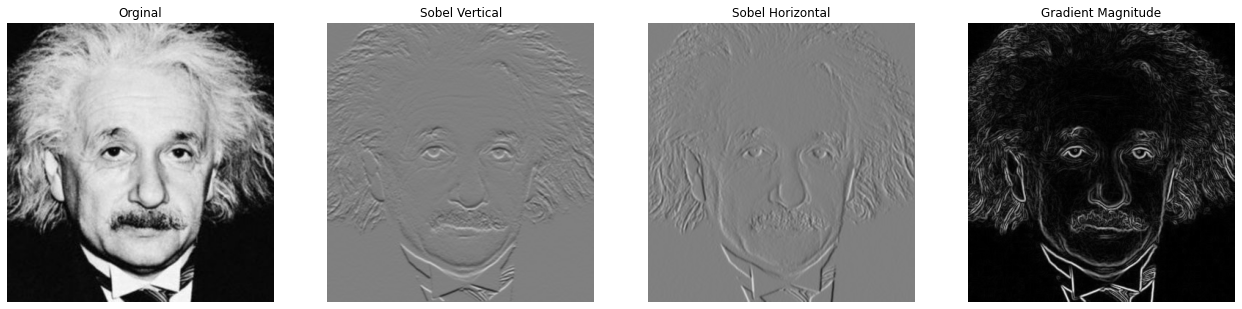

In [85]:
# Q6 (a)

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
im1 = cv.filter2D(im,-1,sobel_v)
im2 = cv.filter2D(im,-1,sobel_h)
grad_mag = np.sqrt(im1**2 + im2**2)

fig , ax = plt.subplots(1,4, figsize=(22,6))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(im1,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title('Sobel Vertical')
ax[2].imshow(im2,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(grad_mag,cmap='gray')
ax[3].set_title('Gradient Magnitude')
for i in range(4):
    ax[i].axis('off')
plt.show()

$Q 6$ $(b)$

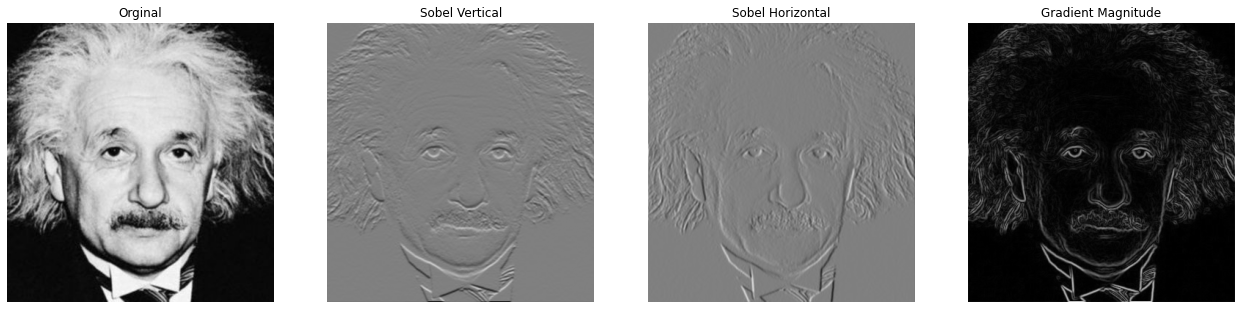

In [86]:
# Q6 (b)

# if sobel_v is False, sobel horizontal is applied
def sobelFiltering(img, sobel_v=True):
    result = np.zeros(img.shape,'float')
    img_=img
    img_ = np.append(img_,np.zeros((1,img.shape[1]),'float'),axis=0)
    img_ = np.append(img_,np.zeros((img_.shape[0],1),'float'),axis=1)
    img_ = np.insert(img_, 0, 0, axis=0)
    img_ = np.insert(img_, 0, 0, axis=1)

    if sobel_v==True:
        kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
    else:
        kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i,j] = np.sum(np.dot(img_[i:i+3,j:j+3].flatten(),kernel.flatten()),dtype=np.int32)
    return result

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

im1 = sobelFiltering(im, sobel_v=True)
im2 = sobelFiltering(im, sobel_v=False)
grad_mag = np.sqrt(im1**2 + im2**2)

fig , ax = plt.subplots(1,4, figsize=(22,6))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(im1,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title('Sobel Vertical')
ax[2].imshow(im2,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(grad_mag,cmap='gray')
ax[3].set_title('Gradient Magnitude')
for i in range(4):
    ax[i].axis('off')
plt.show()

$Q 6$ $(c)$

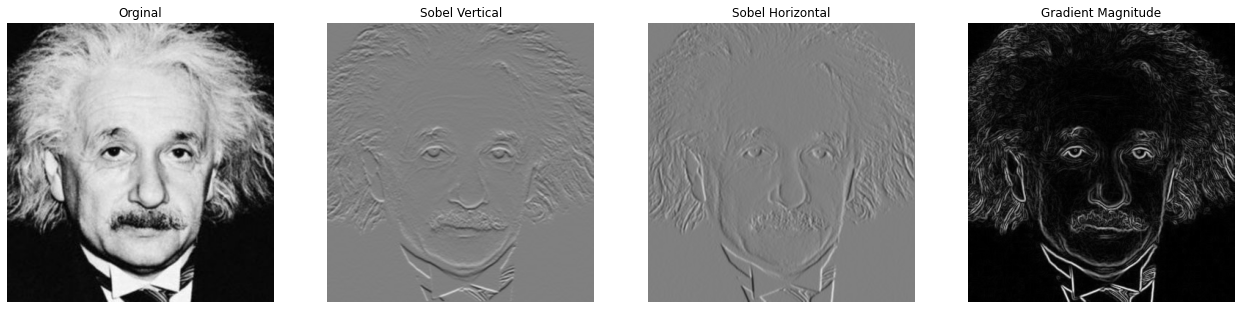

In [87]:
# Q6 (c)

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v1 = np.array([[-1],[0],[1]],dtype=np.float32)
sobel_v2 = np.array([[-1,-2,-1]],dtype=np.float32)
sobel_h1 = np.array([[-1],[-2],[-1]],dtype=np.float32)
sobel_h2 = np.array([[-1,0,1]],dtype=np.float32)
im1 = cv.filter2D(im,-1,sobel_v1)
im1 = cv.filter2D(im1,-1,sobel_v2)
im2 = cv.filter2D(im,-1,sobel_h1)
im2 = cv.filter2D(im2,-1,sobel_h2)

grad_mag = np.sqrt(im1**2 + im2**2)

fig , ax = plt.subplots(1,4, figsize=(22,6))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(im1,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title('Sobel Vertical')
ax[2].imshow(im2,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(grad_mag,cmap='gray')
ax[3].set_title('Gradient Magnitude')
for i in range(4):
    ax[i].axis('off')
plt.show()

In part (c), Sobel Filtering is carried out by using $associative$ $property$. (As I interpreted the question)

$Q 7$ $(a)$

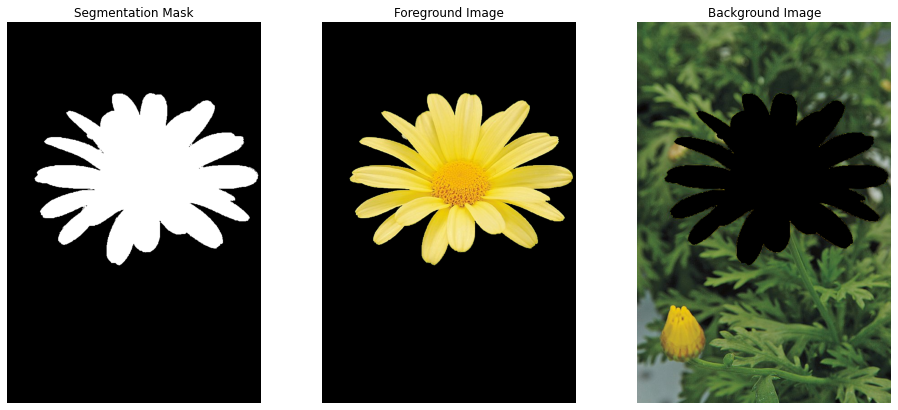

In [88]:
# Q7 (a)

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(r'Assignment-01 Materials\daisy.jpg',cv.IMREAD_COLOR).astype(np.uint8)
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (25,125,530,450)

cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_ = img*mask2[:,:,np.newaxis]
backG = img-img_

fig , ax = plt.subplots(1,3, figsize=(16,7))
ax[0].imshow(cv.cvtColor(255*mask2.astype(np.uint8), cv.COLOR_BGR2RGB))
ax[0].set_title('Segmentation Mask')
ax[1].imshow(cv.cvtColor(img_, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground Image')
ax[2].imshow(cv.cvtColor(backG, cv.COLOR_BGR2RGB))
ax[2].set_title('Background Image')
for i in range(3):
    ax[i].axis('off')
plt.show()

$Q 7$ $(b)$

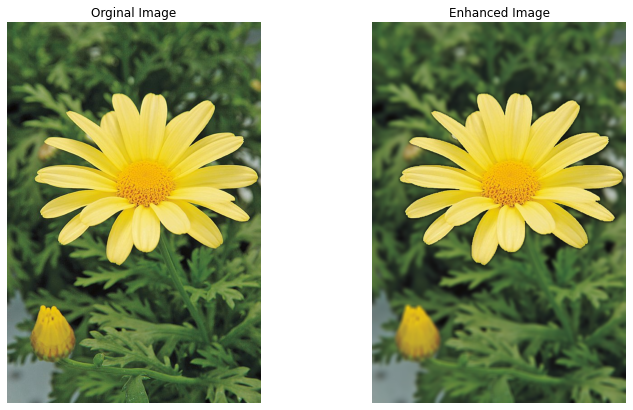

In [89]:
# Q7 (b)

k_size = 9
sigma = 10

blurredBack = cv.GaussianBlur(backG,(k_size,k_size),sigma)
blurredBack = cv.bitwise_and(blurredBack,blurredBack,mask=cv.bitwise_not(255*mask2.astype(np.uint8)));
enhanced = img_ + blurredBack

fig , ax = plt.subplots(1,2,figsize=(12,7))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Orginal Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
ax[1].axis('off')
plt.show()

$Q 7$ $(c)$

When gaussian blur is added to the background image, area of the segmentation(flower) is 0 (black). Therefore, the pixels just beyond the edge of flower become darker (low value) due to the convolution.